In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
#reading in csv
df = pd.read_csv('data/Stock Data Final.csv')
df.head()
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

R^2  0.39384598146188066


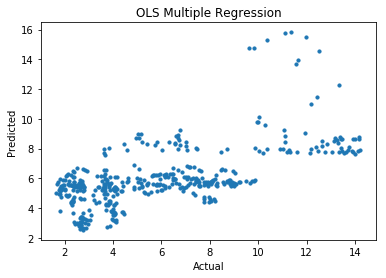

In [20]:
#creating multiple Linear regression model
%matplotlib inline
X = df[['Google', 'Apple', 'Amazon']]
y = df['AMD_CLOSE']
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
model = lm.fit(X_train, y_train)
predicted = lm.predict(X_test)
plt.scatter(y_test, predicted, s=10)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('OLS Multiple Regression')
print('R^2: ', model.score(X_test, y_test))

R^2:  0.3761401920456222


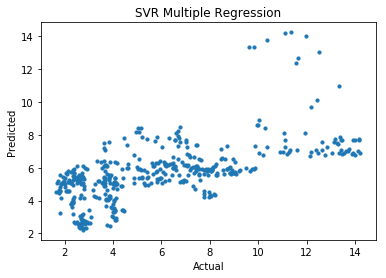

In [21]:
#creating multiple support vector regression
svr = SVR(kernel='linear')
model = svr.fit(X_train, y_train)
predicted = svr.predict(X_test)
plt.scatter(y_test, predicted, s=10)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR Multiple Regression')
print('R^2: ', model.score(X_test, y_test))

In [15]:
#function to create linear models for each individual company
def create_linear_model(X, y, x_label, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
    svr = SVR(kernel='linear')
    svr_model = svr.fit(X_train, y_train)
    ols_model = lm.fit(X_train, y_train)
    
    ols_pred = lm.predict(X_test)
    svr_pred = svr.predict(X_test)
    
    plt.scatter(X_test, y_test, color='black', s=10)
    plt.plot(X_test, ols_pred, color='red', label='OLS')
    plt.plot(X_test, svr_pred, color='blue', label='SVR')
    plt.xlabel(x_label)
    plt.ylabel('AMD Closing')
    plt.title(title)
    plt.legend(loc='upper left')
    
    print('OLS Score: ', ols_model.score(X_test, y_test))
    print('SVR Score: ', svr_model.score(X_test, y_test))
    pass

OLS Score:  0.1045745949806276
SVR Score:  0.08972979285648919


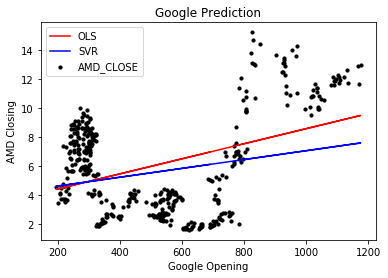

In [16]:
#creating linear regression with only Google
X = df[['Google']]
y = df['AMD_CLOSE']
create_linear_model(X, y, 'Google Opening', 'Google Prediction')

OLS Score:  0.04614582290647817
SVR Score:  0.00241095857124507


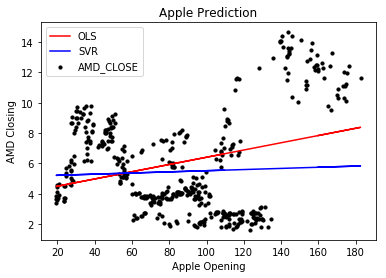

In [17]:
#creating linear regression with only Apple
X = df[['Apple']]
y = df['AMD_CLOSE']
create_linear_model(X, y, 'Apple Opening', 'Apple Prediction')

OLS Score:  0.23261395395682716
SVR Score:  0.20178506195415633


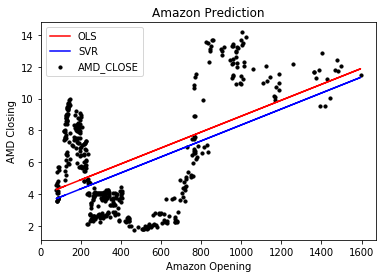

In [18]:
#creating linear regression with only Amazon
X = df[['Amazon']]
y = df['AMD_CLOSE']
create_linear_model(X, y, 'Amazon Opening', 'Amazon Prediction')